In [2]:
import os
import pickle
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from collections import OrderedDict
from bokeh.models import HoverTool
from bokeh.plotting import ColumnDataSource, figure, output_file, show

from bokeh.io import output_file, output_notebook
# needed to show Bokeh plots in IPython Notebok
output_notebook()

ImportError: No module named pandas

# Bokeh interactive plot example

In [ ]:
from bokeh.sampledata.unemployment1948 import data

data['Year'] = [str(x) for x in data['Year']]

years = list(data['Year'])
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

data = data.set_index('Year')

# this is the colormap from the original NYTimes plot
colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce",
          "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]

# Set up the data for plotting. We will need to have values for every
# pair of year/month names. Map the rate to a color.
month = []
year = []
color = []
rate = []
for y in years:
    for m in months:
        month.append(m)
        year.append(y)
        monthly_rate = data[m][y]
        rate.append(monthly_rate)
        color.append(colors[min(int(monthly_rate)-2, 8)])

In [ ]:
source = ColumnDataSource(
    data=dict(month=month, year=year, color=color, rate=rate)
)

TOOLS = "resize,hover,save,pan,box_zoom,wheel_zoom"

p = figure(title="US Unemployment (1948 - 2013)",
           x_range=years, y_range=list(reversed(months)),
           x_axis_location="above", plot_width=900, plot_height=400,
           toolbar_location="left", tools=TOOLS)

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = np.pi/3

p.rect("year", "month", 1, 1, source=source,
       color="color", line_color=None)

p.select_one(HoverTool).tooltips = [
    ('date', '@month @year'),
    ('rate', '@rate'),
]

output_file('unemployment.html', title="unemployment.py example")

show(p)

# Initial look at PKS data

In [ ]:
file_directory = '/home/clarae1/projects/pks/analysis_data/dataset1'

In [ ]:
# output first 10 lines in file
counter = 0
for line in open(os.path.join(file_directory, 'amphotericinB_module_1_test.cov'), 'rb'):
    # stop printing lines if we have printed 10 lines
    if counter > 10:
        break
    # otherwise print line and increment counter
    else:        
        if line[0] != '>':
            line = [float(entry) for entry in line.split()]
        print line
        counter +=1

# Analyzing arbitrary modules in a cluster

In [4]:
# get annotations for a given subunit
def get_annotations(filename, clustername, subunit):
    data = pickle.load(open(filename, 'rb'))
    # prints annotations
    print data[clustername]['subunits'][subunit]
    # prints sequence
    print '%s subunit %d has length %d.' %(clustername, subunit, len(data[clustername]['subunits'][subunit]['sequence']))

In [1]:
filename = '/home/baldig-projects/projects_clarae1/pks_database/160225_type1modular_v2.pkl'
clustername = 'Avermectin'
subunit = 1

# recall that the following scheme was used for breaking into modules
# if domains is an ACP, check if it is the last module
# if so, module continues to the end of the sequence
# otherwise module terminates at the beginning of next 
# labeled catalytic domain

get_annotations(filename, clustername, subunit)

NameError: name 'get_annotations' is not defined

In [30]:
# get covariance information for a given subunit
def get_covariance(filename, clustername, modulenum, modulelen, pickle_file = False):
     
    # initialize matrices for mututal information and covariance
    mut_mat = np.ones((modulelen, modulelen))*-1
    con_mat = np.ones((modulelen, modulelen))*-1
    cov_mat = np.ones((modulelen, modulelen))*-1
    
    start_getting_values = False
    
    # iterate over file that contains module
    for line in open(filename, 'rb'):
 
        # First check if sequence has been reached yet
        if start_getting_values:
            
            # Stop getting values if the next sequence has been reached
            if line[0] == '>':
                # Pickle matrices if desired
                if pickle_file:
                    pickle.dump(open(str(clustername) + str(modulename) + '_mut_mat', 'rb'), mut_mat)
                    pickle.dump(open(str(clustername) + str(modulename) + '_cov_mat', 'rb'), cov_mat)
                print 'Completed matrix for cluster ' + str(clustername) + ' module ' + str(modulenum)
                print 'Last entry was (%d, %d)' %(findex, sindex)
                # Return filled in matrices
                return (mut_mat, con_mat, cov_mat)
            
            # If the next sequence has not been reached, then fill in matrix
            try:
                # first two entries are residue pairs, next five entries are as follows
                # 1: mutual information
                # 2: normalized mutual information
                # 3: mean contact potential
                # 4-5: measure of contact probability from metacycle        
                line = [float(entry) for entry in line.split()]
                findex = int(line[0]) - 1
                sindex = int(line[1]) - 1
                # fill in mutal information matrix (use #2)
                mut_mat[findex, sindex] = line[3]
                mut_mat[sindex, findex] = line[3]
                # fill in contact potential matrix (use #3)
                con_mat[findex, sindex] = line[4]
                con_mat[sindex, findex] = line[4]
                # fill in covariance matrix (use #5)
                cov_mat[findex, sindex] = line[6]
                cov_mat[sindex, findex] = line[6] 
            except Exception as e:
                print(e)
                pass

        # If sequence has not been reached yet, then keep reading lines
        # Check if sequence has been reached if the current line is a leader sequence
        if line[0] == '>':
            print 'Checking line '
            print line
            initial_check = line.split('|')[1]
            cluster_check = initial_check.split(' subunit ')[0]
            module_check = int(initial_check.split(' module ')[1])
            if cluster_check == clustername and module_check == modulenum:
                print 'Reached cluster ' + str(cluster_check) + ' module ' + str(module_check)
                start_getting_values = True


In [31]:
filename = '/extra/clarae10/projects/pks/analysis_data/dataset1/amphotericinB_module_trim.cov'
mut_mat, con_mat, cov_mat = get_covariance(filename, 'Amphotericin B', 2, 1577)

Checking line 
>AF357202|Amphotericin B subunit 1 module 1

Checking line 
>AF357202|Amphotericin B subunit 2 module 2

Reached cluster Amphotericin B module 2
Completed matrix for cluster Amphotericin B module 2
Last entry was (1575, 1576)


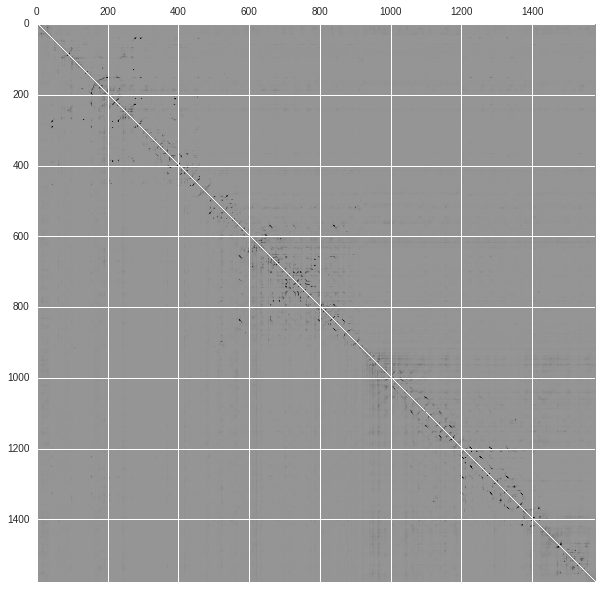

In [34]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.matshow(cov_mat)

In [9]:
def rgb_to_hex(rgb_tuple):
    assert len(rgb_tuple) == 3, "Length three tuple expected."
    hexcolor = '#%02x%02x%02x' %(rgb_tuple)
    return hexcolor

def get_color(val):
    # get n colors spread across colormap all at once instead of using function
    # colors = [cm.seismic(x) for x in np.linspace(0, 1, n)]
    cmap = cm.get_cmap('seismic')
    # Note that cmap returns RGBA (RGB, alpha) tuple rescaled from 0 to 1
    rgb = tuple(np.multiply(cmap(val)[:3], 255))
    return rgb_to_hex(rgb)

def get_scaled_color(mmin, mmax, metric):
    val = (metric - mmin) / (mmax - mmin)
    return get_color(val)

# Test plot

In [ ]:
# choose how many residues to show
startres = 0
stopres = 10
nres = stopres - startres

res1_range = [str(res) for res in np.arange(startres, stopres, 1)]
res2_range = res1_range

# set up data for plotting
# need value for every set of residue pairs
# note that numbers need to be passed as strings for plotting
# along the y axis (res1), we want [1 2 3 1 2 3 1 2 3]
# along the x axis (res2), we want [1 1 1 2 2 2 3 3 3]
res1 = [str(np.mod(res, nres)) for res in range(nres**2)]
res2 = [str(int(np.floor(res/nres))) for res in range(nres**2)]
metric = cov_mat[startres:stopres, startres:stopres].ravel()
        
# map metric to a color
metric_min = np.min(metric)
metric_max = np.max(metric)

In [ ]:
%%time

color = []
for m in metric:
    color.append(get_scaled_color(metric_min, metric_max, m))

In [ ]:
source = ColumnDataSource(
    data=dict(res1=res1, res2=res2, metric=metric, color=color)
)

TOOLS = "resize,hover,save,pan,box_zoom,wheel_zoom"

p = figure(title="Covariance in Amp Mod 1 KS-AT Catalytic Domains",
           # x_range and y_range are lists of strings for the x and y axes
           x_range=res1_range, y_range=list(reversed(res2_range)),
           x_axis_location="above", plot_width=500, plot_height=500,
           toolbar_location="left", tools=TOOLS)


p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "12pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = np.pi/3

# x and y are the coordinates of the squares fill in the plot
p.rect(x="res1", y="res2", width=1, height=1, source=source,
       color="color", line_color=None)

p.select_one(HoverTool).tooltips = [
    ('residues', '@res1 @res2'),
    ('metric', '@metric'),
]

output_file('cov_mat.html', title="Contact probability in Amp Mod 1 KS-AT Catalytic Domains")

show(p)

# Full plot

In [24]:
# get residues for amphotericinB module 1
seq_file = '/home/baldig-projects/projects_clarae1/baldig/160225_type1modular_v2.fasta'
aa_seq_list = []
start_printing = False
for line in open(seq_file, 'rb'):
    if start_printing == True:
        if line[0] == '>':
            break
        print 'Appending:'
        print line.strip()
        aa_seq_list.append(line.strip())
    if line.strip() == '>AF357202|Amphotericin B subunit 2 module 2':
        print 'Reached sequence of interest...'
        start_printing = True

Reached sequence of interest...
Appending:
MPEPQQNQQEKVVDYLRRVTNDLRRARRRIGELESRDNEPVAIVGMSCRLPGGVSSPESLWELVESGGDAISGFPADRGW
Appending:
DIEALTGKGEGSSSTHEGGFLYEATDFDAGFFGISPREATAMDPQQRLLLEVSWEALERAGIAPTSLRSSATGVFVGSYH
Appending:
WGAPSADTATELHGHALTGTAASVLSGRLSYVYGLEGPAVTVDTACSSSLVALHMAAQSLRNGESSLALVGGVTILAEPS
Appending:
VFVEFSAQGGLAQDGRCKAFSDSADGTGWSEGAAVLVVERLSDARRAGHRVLAVVRGSAVNQDGASNGLTAPNGPSQQRV
Appending:
IRQALANAGLRPGDVDAVEAHGTGTPLGDPIEAQALIATYGSDRDPQQPLLLGSVKSNIGHTQSAAGVAGLVKMVMAMHN
Appending:
GTLPRTLHLTEPSTHVDWSLGAVRLLTEETAWPETGRVRRAAVSSFGISGTNAHAVLEQAPVPAEDAEDAGTEDAPQQPA
Appending:
TVPGALPWLLSAHSGQALCDQAAALVTRLDADPEPRPQDIGQGLLTSRALLERRAVVVGTGRDELLTGSRALAEGQSWNG
Appending:
LAEGTADVDGRTVFVFPGQGSQWVGMGARLLDESPVFAERIAECAAALAEFTDWDLLDVLRGAEGAPTLERVDVVQPASF
Appending:
AVMVSLAAVWRAQGVEPDAVVGHSQGEIAAAVVSGALSLRDGARVVALRSQAIGRTLAGRGGMMSVALPVADVEARLEAF
Appending:
GGRVSVAAENGPRSCVVSGEPGALDELSELLTAEGVRVRRVPVDYASHSHHVEDLHDEILQLLAEVAPKASEVPLFSTVT
Appending:
GDWLDTTVMDAGYWFRSLRGRVLFADAIRGLLDTEHR

In [25]:
aa_seq = ''.join(aa_seq_list)
print len(aa_seq)
print aa_seq

1577
MPEPQQNQQEKVVDYLRRVTNDLRRARRRIGELESRDNEPVAIVGMSCRLPGGVSSPESLWELVESGGDAISGFPADRGWDIEALTGKGEGSSSTHEGGFLYEATDFDAGFFGISPREATAMDPQQRLLLEVSWEALERAGIAPTSLRSSATGVFVGSYHWGAPSADTATELHGHALTGTAASVLSGRLSYVYGLEGPAVTVDTACSSSLVALHMAAQSLRNGESSLALVGGVTILAEPSVFVEFSAQGGLAQDGRCKAFSDSADGTGWSEGAAVLVVERLSDARRAGHRVLAVVRGSAVNQDGASNGLTAPNGPSQQRVIRQALANAGLRPGDVDAVEAHGTGTPLGDPIEAQALIATYGSDRDPQQPLLLGSVKSNIGHTQSAAGVAGLVKMVMAMHNGTLPRTLHLTEPSTHVDWSLGAVRLLTEETAWPETGRVRRAAVSSFGISGTNAHAVLEQAPVPAEDAEDAGTEDAPQQPATVPGALPWLLSAHSGQALCDQAAALVTRLDADPEPRPQDIGQGLLTSRALLERRAVVVGTGRDELLTGSRALAEGQSWNGLAEGTADVDGRTVFVFPGQGSQWVGMGARLLDESPVFAERIAECAAALAEFTDWDLLDVLRGAEGAPTLERVDVVQPASFAVMVSLAAVWRAQGVEPDAVVGHSQGEIAAAVVSGALSLRDGARVVALRSQAIGRTLAGRGGMMSVALPVADVEARLEAFGGRVSVAAENGPRSCVVSGEPGALDELSELLTAEGVRVRRVPVDYASHSHHVEDLHDEILQLLAEVAPKASEVPLFSTVTGDWLDTTVMDAGYWFRSLRGRVLFADAIRGLLDTEHRAFIEVSSHPVLAMSVQDMIDDAGVVGVASGTLRRDNGGLDRFLLSAAQVFVRGVQVDWAPLFEGTGATRVDLPTYAFQHERYWNDRAVVDRSASAPMDAEFWAAVEQADVSALTEALGTDEESVAAILPGLASWRRTRGERSTVDSWRYRVVWEPLAQ

In [12]:
print list(aa_seq[10:20])

['K', 'V', 'V', 'D', 'Y', 'L', 'R', 'R', 'V', 'T']


In [24]:
def interactive_plot(startres, stopres, mmatrix, aaseq=None, savefile=None):

    # number of residues that will be shown
    nres = stopres - startres

    # x axis and y axis of plot
    res1_range = [str(res) for res in np.arange(startres, stopres, 1)]
    res2_range = res1_range

    # set up data for plotting
    # need value for every set of residue pairs
    # note that numbers need to be passed as strings for plotting IFF they are being used for axis labels
    # along the y axis (res1), we want [1 2 3 1 2 3 1 2 3]
    # along the x axis (res2), we want [1 1 1 2 2 2 3 3 3]
    res1 = [np.mod(res, nres) for res in range(nres**2)]
    # need negative values to plot by integers
    res2label = [int(np.floor(res/nres)) for res in range(nres**2)]
    res2plot = [-res for res in res2label]
    
    # generate metrics for plotting
    assert mmatrix.shape[0] == mmatrix.shape[1], "Square matrix expected."
    assert mmatrix.shape[0] > nres, "Matrix is too small to specify %d residues." %(nres)
    metric = mmatrix[startres:stopres, startres:stopres].ravel()

    # map metric to a color
    metric_min = np.min(metric)
    metric_max = np.max(metric)
    print("Generating colors.")
    color = []
    for m in metric:
        color.append(get_scaled_color(metric_min, metric_max, m))
    print("All colors generated.")

    TOOLS = "resize,pan,box_zoom,wheel_zoom,hover,save"

    if savefile:
        assert type(savefile) == str, "savefile is expected to be a str."
        title = savefile
        htmlfile = savefile.lower().replace(' ', '_')
    else:
        title = 'Heatmap'
        htmlfile = 'heatmap'

    p = figure(title=title,
               # x_range and y_range index and label the x and y axes
               # if they aren't provided, index seems to default to integers
               # x_range=res1_range, y_range=list(reversed(res2_range)),
               x_axis_location="above", plot_width=1000, plot_height=1000,
               toolbar_location="left", tools=TOOLS)

    # remove padding, grid lines, and axis lnes
    p.min_border_left = 0
    p.min_border_right = 0
    p.min_border_top = 0
    p.min_border_bottom = 0
    p.grid.grid_line_color = None
    p.axis.axis_line_color = None
    
    # parameters for ticks
    p.axis.major_tick_line_color = None
    p.xaxis[0].ticker.desired_num_ticks = 10
    p.yaxis[0].ticker.desired_num_ticks = 10
    p.axis.major_label_text_font_size = "10pt"
#    p.axis.major_label_standoff = 0
#    p.xaxis.major_label_orientation = np.pi/3

    datadict = {'res1':res1, 'res2label':res2label, 'res2plot':res2plot,
                'metric':metric, 'color':color}

    tooltips = [
        ('residues', '@res1 @res2label'),
        ('metric', '@metric'),
    ]
    
    if aaseq:
        assert len(aaseq) > nres, "Sequence is too short to specify %d residues." %(nres)
        aa1 = [aaseq[i] for i in res1]
        aa2 = [aaseq[i] for i in res2label]
        datadict['aa1'] = aa1
        datadict['aa2'] = aa2
        tooltips.insert(0, ('amino acids', '@aa1 @aa2'))
    
    source = ColumnDataSource(
        data=datadict
    )

    # x and y are the coordinates of the squares fill in the plot
    p.rect(x="res1", y="res2plot", width=1, height=1, source=source,
           color="color", line_color=None)
        
    p.select_one(HoverTool).tooltips = tooltips

    output_file('%s.html' %(htmlfile), title=title)
    print("Saved output file as %s.html!" %(htmlfile))

    show(p)

In [ ]:
%%time
interactive_plot(893, 1377, cov_mat, aaseq=aa_seq, savefile='Amp Mod 1 DE-KR Contact Probability')

Generating colors.
All colors generated.
Saved output file as amp_mod_1_de-kr_contact_probability.html!


In [28]:
debs = "MSGDNGMTEEKLRRYLKRTVTELDSVTARLREVEHRAGEPIAIVGMACRFPGDVDSPESF\
WEFVSGGGDAIAEAPADRGW---------EPDPDARLGGMLAAAGDFDAGFFGISPREAL\
AMDPQQRIMLEISWEALERAGHDPVSLRGSATGVFTGVGTVDYGPRPDEAPDEVLGYVGT\
GTASSVASGRVAYCLGLEGPAMTVDTACSSGLTALHLAMESLRRDECGLALAGGVTVMSS\
PGAFTEFRSQGGLAADGRCKPFSKAADGFGLAEGAGVLVLQRLSAARREGRPVLAVLRGS\
AVNQDGASNGLTAPSGPAQQRVIRRALENAGVRAGDVDYVEAHGTGTRLGDPIEVHALLS\
TYGAERDPDDPLWIGSVKSNIGHTQAAAGVAGVMKAVLALRHGEMPRTLHFDEPSPQIEW\
DLGAVSVVSQARSWPAGERPRRAGVSSFGISGTNAHVIVEEAP----------EADEP-E\
PAPDSGPVPLVLSGRDEQAMRAQAGRLADHLAREPRNSLRDTGFTLATRRSAWEHRAVVV\
G-DRDEALAGLRAVADGRIADRTATGQARTRRGVAMVFPGQGAQWQGMARDLLRESQVFA\
DSIRDCERALAPHVDWSLTDLLSGAR---PLDRVDVVQPALFAVMVSLAALWRSHGVEPA\
AVVGHSQGEIAAAHVAGALTLEDAAKLVAVRSRVL-RRLGGQGGMASFGLGTEQAAERIG\
RFAGALSIASVNGPRSVVVAGESGPLDELIAECEAEAHKARRIPVDYASHSPQVESLREE\
LLTELAGISPVSADVALYSTTTGQPIDTATMDTAYWYANLREQVRFQDATRQLAEAGFDA\
FVEVSPHPVLTVGIEATLDSALPADAGACVV--GTLRRDRGGLADFHTALGEAYAQGVEV\
DWSPAF--ADARPVELPVYPFQRQRYWLPIPTGGRARDEDDD------------------\
------------------------------WRYQ--------------------------\
------------------------------------------------------------\
------------------------------------------------------------\
------------------------------------------------------------\
------------------------------------------------------------\
------------------------------------------------------------\
------------------------------------------------------------\
------------------------------------------------------------\
------------------------------------------------------------\
------------------------------------------------------------\
------------------------"
amp = "MPEPQQNQQEKVVDYLRRVTNDLRRARRRIGELESRDNEPVAIVGMSCRLPGGVSSPESL\
WELVESGGDAISGFPADRGWDIEALTGKGEGSSSTHEGGFLYEATDFDAGFFGISPREAT\
AMDPQQRLLLEVSWEALERAGIAPTSLRSSATGVF--VGSYHWGAPSADTATELHGHALT\
GTAASVLSGRLSYVYGLEGPAVTVDTACSSSLVALHMAAQSLRNGESSLALVGGVTILAE\
PSVFVEFSAQGGLAQDGRCKAFSDSADGTGWSEGAAVLVVERLSDARRAGHRVLAVVRGS\
AVNQDGASNGLTAPNGPSQQRVIRQALANAGLRPGDVDAVEAHGTGTPLGDPIEAQALIA\
TYGSDRDPQQPLLLGSVKSNIGHTQSAAGVAGLVKMVMAMHNGTLPRTLHLTEPSTHVDW\
SLGAVRLLTEETAWPETGRVRRAAVSSFGISGTNAHAVLEQAPVPAEDAEDAGTEDAPQQ\
PATVPGALPWLLSAHSGQALCDQAAALVTRLDADPEPRPQDIGQGLLTSRALLERRAVVV\
GTGRDELLTGSRALAEGQSWNGLAEGTADVDGRTVFVFPGQGSQWVGMGARLLDESPVFA\
ERIAECAAALAEFTDWDLLDVLRGAEGAPTLERVDVVQPASFAVMVSLAAVWRAQGVEPD\
AVVGHSQGEIAAAVVSGALSLRDGARVVALRSQAIGRTLAGRGGMMSVALPVADVEARLE\
AFGGRVSVAAENGPRSCVVSGEPGALDELSELLTAEGVRVRRVPVDYASHSHHVEDLHDE\
ILQLLAEVAPKASEVPLFSTVTGDWLDTTVMDAGYWFRSLRGRVLFADAIRGLLDTEHRA\
FIEVSSHPVLAMSVQDMID-----DAGVVGVASGTLRRDNGGLDRFLLSAAQVFVRGVQV\
DWAPLFEGTGATRVDLPTYAFQHERYWNDRAVVDRSASAPMDAEFWAAVEQADVSALTEA\
LGTDEESVAAILPGLASWRRTRGERSTVDSWRYRVVWEPLAQIPRATLDGTWLLVSAGGV\
DDDVAEVLEAGGAEVRRLVLDETCTDPAVLREHLTDTDGLTGIVSVLADAEEGCVRHPGL\
TLGLALSVSLAQALGEADVTAPLWFLTCGAFSTGPSDTVTRPLQSQIAGLGWTVAVEHPH\
RWGGGVDLPEALDARAAQRLVAALAGALGDDDQLAVRPAGVLARRIVRASGDTRRKARSW\
KPRGTTLVTGGSGTLAPGLARHLAAQGAEHLVLLSRRGADAPGAAELAAELQAAGTEVRF\
AACDITDPDAVAALLADLKAEGRTVRTVVHTAAVIELAALADTTVDAFADVVHAKVTGAR\
ILDELLDDEELDDFVLYSSTAGMWGSGVHAAYVAGNAYLSALAEQRRARGARATSIHWGK\
WPDDLERELADPHQIRRSGLEYLDPELAMTALTRVMEDDETVIGLMDIDWGTYHDVFTAG\
RPSHLFDRIPEVARLLADRAAPAATAVATSGLAARLQGVSAAEQDRIVLSVVREETAAVL\
GHASAETVPERRAFRDIGFDSVTAVDLRNRLVAATGLTLPSTMVFDHPNAVALATFLKAT\
ALGTTGTAGDRPTAAVTAGADDDL"

In [66]:
def seq1_to_seq2(seq1, seq2, idx):
    """ Translates indexfrom one sequence to another via a sequence alignment."""
    # Iterate over sequence 1 until idx amino acids are seen
    aa1_seen = 0
    pos1_seen = 0
    while aa1_seen < idx:
        # Only add to aa seen if not a gap
        if seq1[aa1_seen] != '-':
            aa1_seen += 1
        # Add to positions seen regardless
        pos1_seen += 1
    
    assert len(seq1[:pos1_seen]) == len(seq2[:pos1_seen]), "There's an error in the sequence alignment!"
    # Get amino acid at that position in the first sequence
    aa1 = seq1[:pos1_seen][-1]
    # Get amino acid at the position in the other sequence
    aa2 = seq2[:pos1_seen][-1]
        
    print('Residue %s in sequence 1 aligned with residue %s in sequence 2.' %(aa1, aa2))
    
    print len(seq2[:pos1_seen].replace('-', ''))

In [68]:
seq1_to_seq2(amp, debs, 150)

Residue S in sequence 1 aligned with residue S in sequence 2.
141


# Get solvent accessibility and secondary structure information

In [80]:
-

In [65]:
# get residues for amphotericinB module 1
seq_file = '/home/baldig-projects/projects_clarae1/baldig/dataset1/160225_type1modular_v2.acc20'
start_printing = False
for line in open(seq_file, 'rb'):
    if start_printing == True:
        if line[0] == '>':
            break
        print 'Appending:'
        print line.strip()
        acc_seq = [int(i) for i in line.strip().split(' ')]
    if line.strip() == '>AF357202|Amphotericin B subunit 2 module 2':
        print 'Reached sequence of interest...'
        start_printing = True

Reached sequence of interest...
Appending:
75 60 50 50 35 25 40 45 40 50 40 0 25 50 15 0 40 45 0 5 50 45 5 45 50 0 30 50 30 5 40 50 5 45 55 45 55 55 30 5 0 0 0 0 0 0 0 0 15 5 20 25 45 15 45 20 10 50 35 0 5 45 0 0 35 55 30 30 35 5 5 15 55 5 15 45 40 20 20 10 20 5 35 20 5 20 25 40 40 40 35 40 15 10 0 20 25 10 0 0 0 20 15 0 30 45 5 15 5 30 0 0 5 0 5 5 25 15 0 20 20 15 20 20 15 5 25 10 0 0 15 0 0 5 30 0 0 25 35 5 35 5 20 10 35 15 5 40 35 20 40 5 0 0 0 0 0 0 0 10 10 5 10 25 5 25 45 15 35 55 45 5 25 0 10 0 0 0 0 10 5 5 0 0 0 0 0 10 0 0 5 5 0 15 0 35 5 15 5 0 15 0 15 10 5 5 10 10 5 0 0 0 0 5 5 0 0 30 0 0 30 50 35 30 0 30 5 0 0 0 0 0 0 0 0 0 0 10 10 30 5 0 0 25 0 0 30 20 30 5 10 10 35 40 15 25 0 35 20 5 15 55 40 10 45 10 15 0 15 0 10 0 0 0 0 0 0 0 15 20 0 35 45 0 35 45 45 35 20 40 0 0 0 0 0 15 5 10 5 10 20 35 35 25 35 40 45 30 10 30 10 25 40 20 35 20 10 25 30 0 0 30 35 0 0 45 55 15 50 5 30 25 45 35 5 30 5 0 15 5 20 15 35 20 15 45 10 20 15 15 0 10 0 20 5 0 5 20 10 15 20 45 60 25 55 55 60 20 5 0

In [66]:
print acc_seq

[75, 60, 50, 50, 35, 25, 40, 45, 40, 50, 40, 0, 25, 50, 15, 0, 40, 45, 0, 5, 50, 45, 5, 45, 50, 0, 30, 50, 30, 5, 40, 50, 5, 45, 55, 45, 55, 55, 30, 5, 0, 0, 0, 0, 0, 0, 0, 0, 15, 5, 20, 25, 45, 15, 45, 20, 10, 50, 35, 0, 5, 45, 0, 0, 35, 55, 30, 30, 35, 5, 5, 15, 55, 5, 15, 45, 40, 20, 20, 10, 20, 5, 35, 20, 5, 20, 25, 40, 40, 40, 35, 40, 15, 10, 0, 20, 25, 10, 0, 0, 0, 20, 15, 0, 30, 45, 5, 15, 5, 30, 0, 0, 5, 0, 5, 5, 25, 15, 0, 20, 20, 15, 20, 20, 15, 5, 25, 10, 0, 0, 15, 0, 0, 5, 30, 0, 0, 25, 35, 5, 35, 5, 20, 10, 35, 15, 5, 40, 35, 20, 40, 5, 0, 0, 0, 0, 0, 0, 0, 10, 10, 5, 10, 25, 5, 25, 45, 15, 35, 55, 45, 5, 25, 0, 10, 0, 0, 0, 0, 10, 5, 5, 0, 0, 0, 0, 0, 10, 0, 0, 5, 5, 0, 15, 0, 35, 5, 15, 5, 0, 15, 0, 15, 10, 5, 5, 10, 10, 5, 0, 0, 0, 0, 5, 5, 0, 0, 30, 0, 0, 30, 50, 35, 30, 0, 30, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 10, 30, 5, 0, 0, 25, 0, 0, 30, 20, 30, 5, 10, 10, 35, 40, 15, 25, 0, 35, 20, 5, 15, 55, 40, 10, 45, 10, 15, 0, 15, 0, 10, 0, 0, 0, 0, 0, 0, 0, 15, 20, 0, 35,

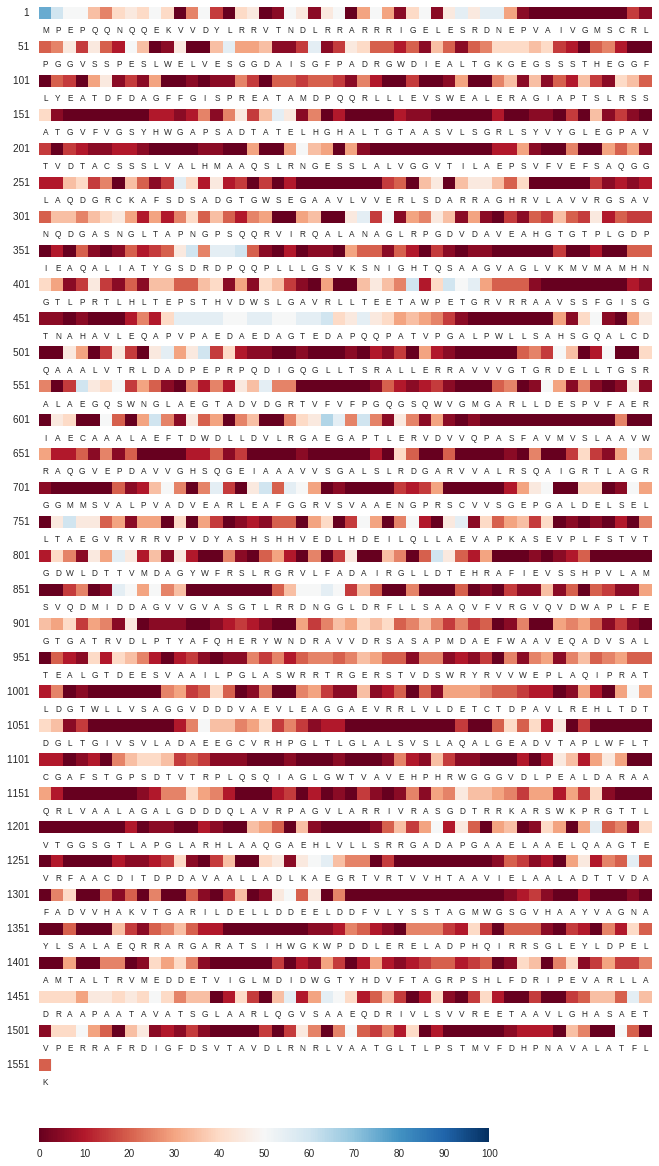

CPU times: user 33.5 s, sys: 364 ms, total: 33.8 s
Wall time: 33.9 s


In [83]:
%%time
plot_heatmap([acc_seq], aa_seq)

In [49]:
# get residues for amphotericinB module 1
seq_file = '/home/baldig-projects/projects_clarae1/baldig/dataset1/160225_type1modular_v2.ss8'
start_printing = False
for line in open(seq_file, 'rb'):
    if start_printing == True:
        if line[0] == '>':
            break
        print 'Appending:'
        print line.strip()
        ss_seq = list(line.strip())
    if line.strip() == '>AF357202|Amphotericin B subunit 2 module 2':
        print 'Reached sequence of interest...'
        start_printing = True

Reached sequence of interest...
Appending:
CCCCCCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHTSCCEEEEEEEEECTTTCSSHHHHHHHHHTTCCCCBCCCTTTTCCHTGCCCTCTTCCEEETTECCSCSCCCCTTTTTCCHHHHHTSCHHHHHHHHHHHHHHHHTTCCGGGGTTSCCEEEEEEEETSCCCCCCCTTCEEEEEECCCCEEEEEEEEEEEECCSCEEEEEHHHHHHHHHHHHHHHHHHTTCCEEEEETEEEEECCTTHEEEHEHHTTCCTTSCCHHHHHTCTSCCHHHHHEEEEEEEHHHHHHTTCEEEEEEEEEEEETTTCCTCSSSCCSHHHHHHHHHHHHHHTCCGGGCCEEECCCCCCHHHHHHHHHHHHHHHGCSCCTTCCEEEEEHHHTHHHHHHHHHHHHHHHHHHHHHTTCCCCEEEECCCCCCECCCTTCEEEEECCCCCCTTSCCSEEEEEEEETTTEEEEEEEECCCCCCCCCCCCCCCCCCCCCCCCCCCCEEEEECCCHHHHHHHHHHHHHHHHHCTTCCHHHHHHHHHHHHHHHHHEEEEEESCHHHHHHHHHHHHTTCCCTTEEEEEECCTSCEEEEECCTTCCCTTTTTTGGHHCTHHHHHHHHHHHHHHTTCCCCHHHHHHTCTTCCGCCHCHEHHHHHHHHHHHHHHHHHHTTCCCTEEEECCHHHHHHHHHHHHHCHHHHHHHHHHHHHHHHHHCTTTCEEEEEECCHHHHHHHHHTCTTCEEEEEEESTTEEEEESCHHHHHHHHHHHHHTTCEEEEEEECEECCCHTHHHHHHHHHHHHHTCCCCCCCCCEEEEEESCCCCTTTCCHHHHHHHHHHHHHHHHHHHHHHHTTCEEEEEECSCHEHHHHHHHHHHHTTCCEEEEEEECTTCTCHHHHHHHHHHHHHTTCCCCHHHHCCTSCCCCCCCCCCHHHHEEEECCCCCCCCCCCCCCHHHHHHHHCCTCHHHHHHHHCCC

In [57]:
# C = coil, not assigned to other confirmations, make this white
# G, H, I = 3, 4, and 5 turn helices, different shades of blue
# T = hydrogen bonded 3, 4, 5 turn -> ?
# E, B = beta-sheet or beta-bridge, different shades of red
# S = bend -> ?

mapping = {'C':50, 
           'G':60, 'H':70, 'I':80, 
           'E':30, 'B':10, 
           'T':100, 
           'S':0}
f = lambda x: mapping[x]
ss_seq_nums = map(f, ss_seq)

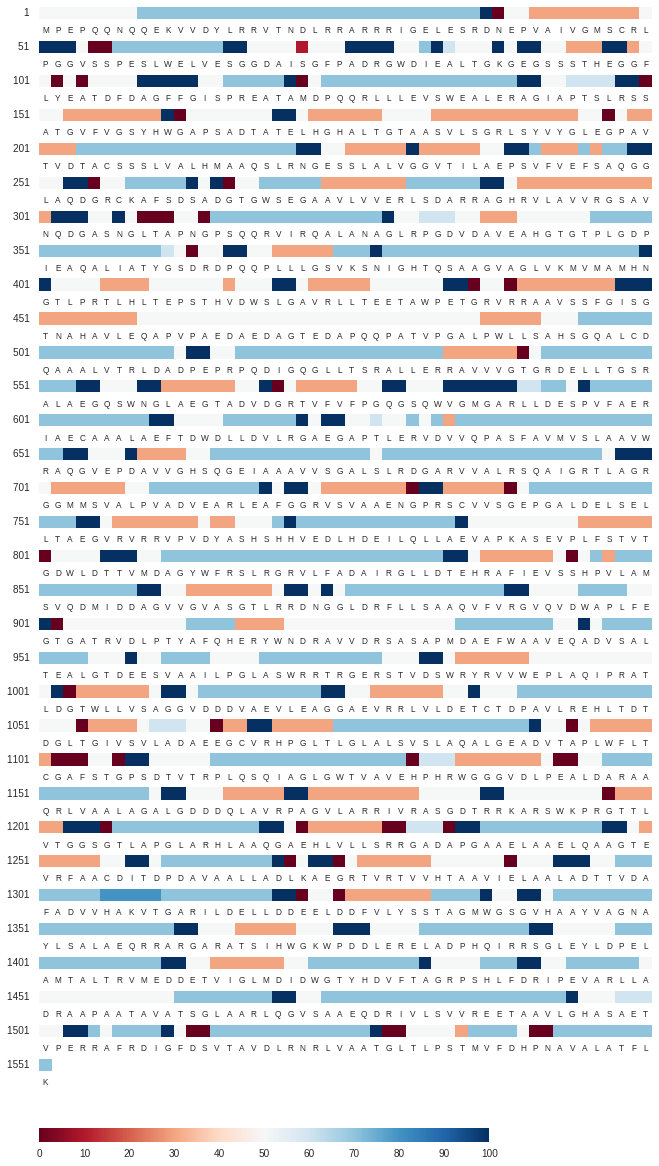

CPU times: user 34 s, sys: 327 ms, total: 34.3 s
Wall time: 34.3 s


In [84]:
%%time
plot_heatmap([ss_seq_nums], aa_seq)

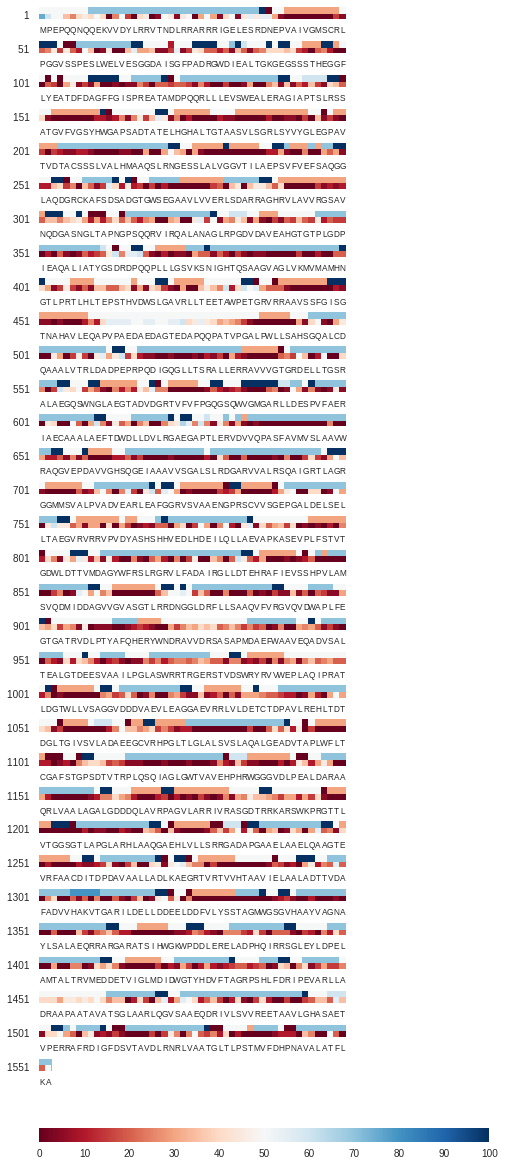

CPU times: user 33.7 s, sys: 326 ms, total: 34.1 s
Wall time: 34.1 s


In [85]:
%%time
plot_heatmap([acc_seq, ss_seq_nums], aa_seq)